<a href="https://colab.research.google.com/github/tarushsingh09/POS-TAGGING/blob/main/E21CSEU0974_TARUSH_SINGH_LAB_7_NLP_POS_TAGGING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#E21CSEU0974
#TARUSH SINGH
#EB-13
#NATURAL LANGUAGE PROCESSING (NLP) LAB 8
#LAB: Lab Assignment 08 – Part-of-Speech Tagging

#Install tensorflow and nltk

In [20]:
!pip install tensorflow
# or
# !pip install torch

!pip install nltk


#Step 1: Import Libraries and Load Dataset

In [21]:
# import necessary libraries
import warnings
warnings.filterwarnings("ignore")

import numpy as np

from matplotlib import pyplot as plt

from nltk.corpus import brown
from nltk.corpus import treebank
from nltk.corpus import conll2000

import seaborn as sns

from gensim.models import KeyedVectors

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential, Input, Model
from tensorflow.keras.layers import Embedding, Dense, TimeDistributed, LSTM, GRU, Bidirectional, SimpleRNN, RNN, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [22]:
import nltk
nltk.download('treebank')
nltk.download('brown')
nltk.download('conll2000')
nltk.download('universal_tagset')

# load POS tagged corpora from NLTK
treebank_corpus = treebank.tagged_sents(tagset='universal')
brown_corpus = brown.tagged_sents(tagset='universal')
conll_corpus = conll2000.tagged_sents(tagset='universal')
tagged_sentences = treebank_corpus + brown_corpus + conll_corpus

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


In [23]:
# let's look at the data
tagged_sentences[11]

[('``', '.'),
 ('We', 'PRON'),
 ('have', 'VERB'),
 ('no', 'DET'),
 ('useful', 'ADJ'),
 ('information', 'NOUN'),
 ('on', 'ADP'),
 ('whether', 'ADP'),
 ('users', 'NOUN'),
 ('are', 'VERB'),
 ('at', 'ADP'),
 ('risk', 'NOUN'),
 (',', '.'),
 ("''", '.'),
 ('said', 'VERB'),
 ('*T*-1', 'X'),
 ('James', 'NOUN'),
 ('A.', 'NOUN'),
 ('Talcott', 'NOUN'),
 ('of', 'ADP'),
 ('Boston', 'NOUN'),
 ("'s", 'PRT'),
 ('Dana-Farber', 'NOUN'),
 ('Cancer', 'NOUN'),
 ('Institute', 'NOUN'),
 ('.', '.')]

#Step 2: Data Preprocessing

In [24]:
# Flatten the list of tagged sentences to obtain (word, pos) pairs
flat_sentences = [item for sublist in tagged_sentences for item in sublist]

# Extract words and POS tags
words, pos_tags = zip(*flat_sentences)

# Create vocabulary and POS tag set
word_vocab = list(set(words))
pos_tag_set = list(set(pos_tags))

# Create word-to-index and tag-to-index dictionaries
word_to_index = {word: i + 1 for i, word in enumerate(word_vocab)}
pos_to_index = {pos: i for i, pos in enumerate(pos_tag_set)}

# Convert words and POS tags to numerical indices
X = [[word_to_index[word] for word, _ in sentence] for sentence in tagged_sentences]
y = [[pos_to_index[pos] for _, pos in sentence] for sentence in tagged_sentences]

# Pad sequences to have a consistent length
X = pad_sequences(X)
y = pad_sequences(y, padding='post')

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


#POS Model Architecture

In [25]:
vocab_size = len(word_vocab) + 1
embedding_dim = 50
input_length = X.shape[1]
num_tags = len(pos_tag_set)

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=input_length))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
model.add(TimeDistributed(Dense(num_tags, activation='softmax')))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 271, 50)           3353400   
                                                                 
 lstm_3 (LSTM)               (None, 271, 100)          60400     
                                                                 
 dropout_3 (Dropout)         (None, 271, 100)          0         
                                                                 
 time_distributed_3 (TimeDis  (None, 271, 12)          1212      
 tributed)                                                       
                                                                 
Total params: 3,415,012
Trainable params: 3,415,012
Non-trainable params: 0
_________________________________________________________________


#Model Training

In [28]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=128)

Epoch 1/5
452/452 [==============================] - 469s 1s/step - loss: 0.2405 - accuracy: 0.9297 - val_loss: 0.2390 - val_accuracy: 0.9297
Epoch 2/5
452/452 [==============================] - 469s 1s/step - loss: 0.2404 - accuracy: 0.9297 - val_loss: 0.2390 - val_accuracy: 0.9297
Epoch 3/5
452/452 [==============================] - 471s 1s/step - loss: 0.2403 - accuracy: 0.9297 - val_loss: 0.2390 - val_accuracy: 0.9298
Epoch 4/5
452/452 [==============================] - 468s 1s/step - loss: 0.2402 - accuracy: 0.9298 - val_loss: 0.2393 - val_accuracy: 0.9297
Epoch 5/5
452/452 [==============================] - 471s 1s/step - loss: 0.2399 - accuracy: 0.9298 - val_loss: 0.2385 - val_accuracy: 0.9299


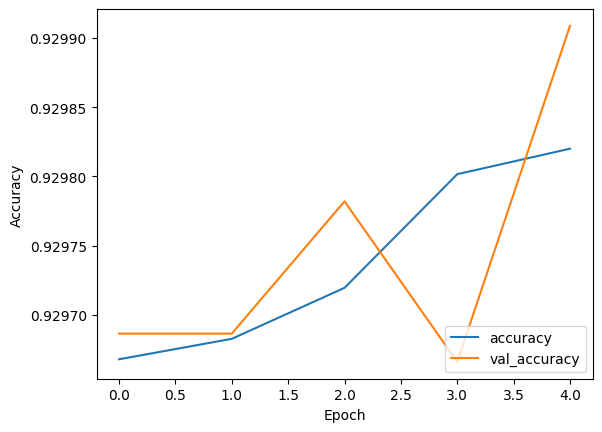

In [29]:
# Visualize training process
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

#Model Evaluation

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate the model on the test set
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=-1)

# Convert numerical indices back to POS tags
y_pred_tags = [pos_tag_set[idx] for idx in y_pred_classes.flatten()]
y_true_tags = [pos_tag_set[idx] for idx in y_test.flatten()]

# Print classification report and confusion matrix
print(classification_report(y_true_tags, y_pred_tags))
print(confusion_matrix(y_true_tags, y_pred_tags))


226/226 [==============================] - 23s 97ms/step
              precision    recall  f1-score   support

           .       0.00      0.00      0.00     19185
         ADJ       0.00      0.00      0.00     10923
         ADP       0.00      0.00      0.00     18592
         ADV       0.95      1.00      0.97   1810803
        CONJ       0.00      0.00      0.00      4742
         DET       0.22      0.09      0.13     17095
        NOUN       0.24      0.31      0.27     38713
         NUM       0.00      0.00      0.00      2965
        PRON       0.00      0.00      0.00      5854
         PRT       0.00      0.00      0.00      4059
        VERB       0.25      0.08      0.12     23242
           X       0.00      0.00      0.00       718

    accuracy                           0.93   1956891
   macro avg       0.14      0.12      0.12   1956891
weighted avg       0.89      0.93      0.91   1956891

[[      0       0       0   13263       0     591    4739       0       0
  

#Fine-Tuning Step - Bidirectional RNN:


In [31]:
from tensorflow.keras.layers import Bidirectional

# Build a Bidirectional LSTM model
model_bidirectional = Sequential()
model_bidirectional.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=input_length))
model_bidirectional.add(Bidirectional(LSTM(units=100, return_sequences=True)))
model_bidirectional.add(Dropout(0.2))
model_bidirectional.add(TimeDistributed(Dense(num_tags, activation='softmax')))

model_bidirectional.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_bidirectional.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 271, 50)           3353400   
                                                                 
 bidirectional_2 (Bidirectio  (None, 271, 200)         120800    
 nal)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 271, 200)          0         
                                                                 
 time_distributed_4 (TimeDis  (None, 271, 12)          2412      
 tributed)                                                       
                                                                 
Total params: 3,476,612
Trainable params: 3,476,612
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the Bidirectional LSTM model
history_bidirectional = model_bidirectional.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=128)

Epoch 1/5
452/452 [==============================] - 884s 2s/step - loss: 0.2988 - accuracy: 0.9266 - val_loss: 0.2401 - val_accuracy: 0.9297
Epoch 2/5
452/452 [==============================] - 857s 2s/step - loss: 0.2423 - accuracy: 0.9296 - val_loss: 0.2400 - val_accuracy: 0.9297
Epoch 3/5
452/452 [==============================] - 868s 2s/step - loss: 0.2417 - accuracy: 0.9296 - val_loss: 0.2406 - val_accuracy: 0.9297
Epoch 4/5
452/452 [==============================] - 865s 2s/step - loss: 0.2414 - accuracy: 0.9296 - val_loss: 0.2399 - val_accuracy: 0.9297
Epoch 5/5
452/452 [==============================] - 874s 2s/step - loss: 0.2410 - accuracy: 0.9297 - val_loss: 0.2395 - val_accuracy: 0.9297


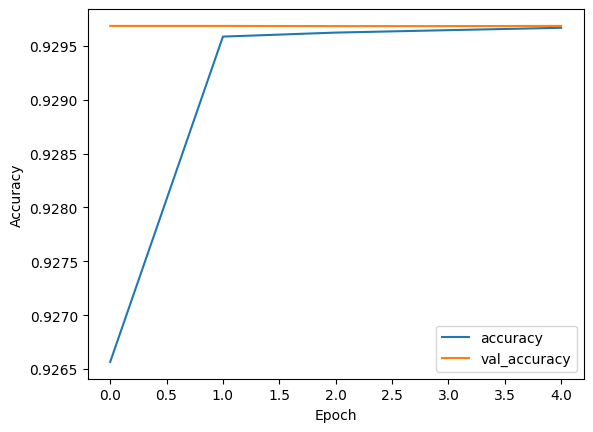

226/226 [==============================] - 37s 146ms/step
Bidirectional LSTM Model:
              precision    recall  f1-score   support

           .       0.00      0.00      0.00     19185
         ADJ       0.00      0.00      0.00     10923
         ADP       0.00      0.00      0.00     18592
         ADV       0.95      1.00      0.97   1810803
        CONJ       0.00      0.00      0.00      4742
         DET       0.00      0.00      0.00     17095
        NOUN       0.23      0.39      0.29     38713
         NUM       0.00      0.00      0.00      2965
        PRON       0.00      0.00      0.00      5854
         PRT       0.00      0.00      0.00      4059
        VERB       0.00      0.00      0.00     23242
           X       0.00      0.00      0.00       718

    accuracy                           0.93   1956891
   macro avg       0.10      0.12      0.11   1956891
weighted avg       0.89      0.93      0.91   1956891

[[      0       0       0   13263       0       0

In [34]:
# Visualize training process
plt.plot(history_bidirectional.history['accuracy'], label='accuracy')
plt.plot(history_bidirectional.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Evaluate the Bidirectional LSTM model on the test set
y_pred_probs_bidirectional = model_bidirectional.predict(X_test)
y_pred_classes_bidirectional = np.argmax(y_pred_probs_bidirectional, axis=-1)

# Convert numerical indices back to POS tags
y_pred_tags_bidirectional = [pos_tag_set[idx] for idx in y_pred_classes_bidirectional.flatten()]
y_true_tags_bidirectional = [pos_tag_set[idx] for idx in y_test.flatten()]

# Print classification report and confusion matrix for the Bidirectional LSTM model
print("Bidirectional LSTM Model:")
print(classification_report(y_true_tags_bidirectional, y_pred_tags_bidirectional))
print(confusion_matrix(y_true_tags_bidirectional, y_pred_tags_bidirectional))


#Fine-Tuning Step - Pre-trained Word Embeddings:


In [36]:
# Download GloVe embeddings (50-dimensional version for demonstration purposes)
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

# Define the create_embedding_matrix function
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath, encoding='utf-8') as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word]
                embedding_matrix[idx] = np.array(vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

# Load GloVe embeddings into an embedding matrix
embedding_matrix = create_embedding_matrix('glove.6B.50d.txt', word_to_index, embedding_dim)

# Build a model with pre-trained word embeddings
model_pretrained_embeddings = Sequential()
model_pretrained_embeddings.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=input_length,
                                          weights=[embedding_matrix], trainable=False))
model_pretrained_embeddings.add(LSTM(units=100, return_sequences=True))
model_pretrained_embeddings.add(Dropout(0.2))
model_pretrained_embeddings.add(TimeDistributed(Dense(num_tags, activation='softmax')))

model_pretrained_embeddings.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_pretrained_embeddings.summary()

--2023-10-09 13:08:43--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-10-09 13:08:43--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-10-09 13:08:43--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.1’

gl

In [37]:
# Train the model with pre-trained embeddings
history_pretrained_embeddings = model_pretrained_embeddings.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=128)

Epoch 1/5
452/452 [==============================] - 416s 911ms/step - loss: 0.3166 - accuracy: 0.9256 - val_loss: 0.2459 - val_accuracy: 0.9269
Epoch 2/5
452/452 [==============================] - 412s 912ms/step - loss: 0.2455 - accuracy: 0.9285 - val_loss: 0.2419 - val_accuracy: 0.9295
Epoch 3/5
452/452 [==============================] - 419s 928ms/step - loss: 0.2433 - accuracy: 0.9296 - val_loss: 0.2406 - val_accuracy: 0.9297
Epoch 4/5
452/452 [==============================] - 416s 921ms/step - loss: 0.2422 - accuracy: 0.9297 - val_loss: 0.2404 - val_accuracy: 0.9297
Epoch 5/5
452/452 [==============================] - 419s 928ms/step - loss: 0.2418 - accuracy: 0.9297 - val_loss: 0.2405 - val_accuracy: 0.9297


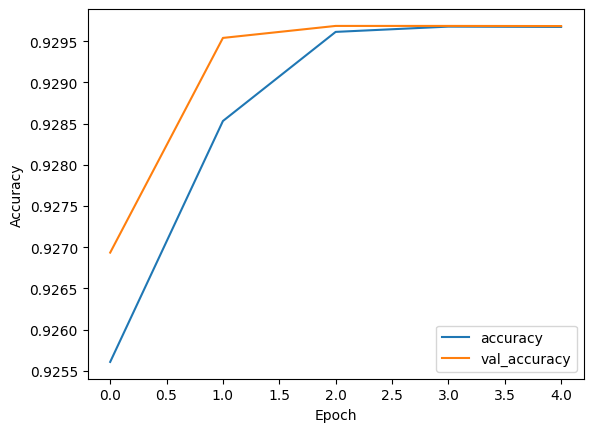

226/226 [==============================] - 22s 92ms/step
Model with Pre-trained Embeddings:
              precision    recall  f1-score   support

           .       0.00      0.00      0.00     19185
         ADJ       0.00      0.00      0.00     10923
         ADP       0.00      0.00      0.00     18592
         ADV       0.96      1.00      0.98   1810803
        CONJ       0.00      0.00      0.00      4742
         DET       0.00      0.00      0.00     17095
        NOUN       0.23      0.43      0.30     38713
         NUM       0.00      0.00      0.00      2965
        PRON       0.00      0.00      0.00      5854
         PRT       0.00      0.00      0.00      4059
        VERB       0.00      0.00      0.00     23242
           X       0.00      0.00      0.00       718

    accuracy                           0.93   1956891
   macro avg       0.10      0.12      0.11   1956891
weighted avg       0.89      0.93      0.91   1956891

[[      0       0       0   12467       0

In [39]:
# Visualize training process
plt.plot(history_pretrained_embeddings.history['accuracy'], label='accuracy')
plt.plot(history_pretrained_embeddings.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Evaluate the model with pre-trained embeddings on the test set
y_pred_probs_pretrained_embeddings = model_pretrained_embeddings.predict(X_test)
y_pred_classes_pretrained_embeddings = np.argmax(y_pred_probs_pretrained_embeddings, axis=-1)

# Convert numerical indices back to POS tags
y_pred_tags_pretrained_embeddings = [pos_tag_set[idx] for idx in y_pred_classes_pretrained_embeddings.flatten()]
y_true_tags_pretrained_embeddings = [pos_tag_set[idx] for idx in y_test.flatten()]


# Print classification report and confusion matrix for the model with pre-trained embeddings
print("Model with Pre-trained Embeddings:")
print(classification_report(y_true_tags_pretrained_embeddings, y_pred_tags_pretrained_embeddings))
print(confusion_matrix(y_true_tags_pretrained_embeddings, y_pred_tags_pretrained_embeddings))
